In [1]:
import torch
from torch import nn
import matplotlib.pyplot as plt

In [2]:
from nnunet.network_architecture.segnet import SmallSegNet, SegNet
from nnunet.network_architecture.generic_UNet import Generic_UNet



Please cite the following paper when using nnUNet:

Isensee, F., Jaeger, P.F., Kohl, S.A.A. et al. "nnU-Net: a self-configuring method for deep learning-based biomedical image segmentation." Nat Methods (2020). https://doi.org/10.1038/s41592-020-01008-z


If you have questions or suggestions, feel free to open an issue at https://github.com/MIC-DKFZ/nnUNet



In [3]:
smallsegnet = SmallSegNet(4, 32, 4, 5)
segnet = SegNet(4, 32, 4, 5)
unet = Generic_UNet(4, 32, 4, 5, convolutional_upsampling=True, conv_op=nn.Conv3d, norm_op = nn.InstanceNorm3d, dropout_op = nn.Dropout3d )

In [4]:
def get_n_params(model):
    pp=0
    for p in list(model.parameters()):
        nn=1
        for s in list(p.size()):
            nn = nn*s
        pp += nn
    return pp

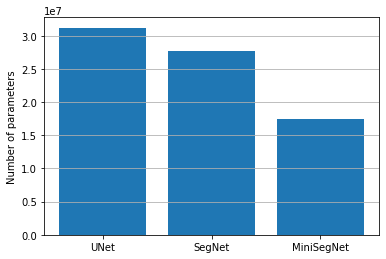

In [11]:
plt.ylabel("Number of parameters")
plt.bar(["UNet", "SegNet", "MiniSegNet"],
        [get_n_params(unet), get_n_params(segnet), get_n_params(smallsegnet)])
plt.grid(axis="y")